<a href="https://colab.research.google.com/github/lognorman20/stockx_competiton/blob/master/notebooks/eda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [4]:
cleandata = pd.read_csv('/content/Clean_Shoe_Data.csv')
df = cleandata.copy()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


In [5]:
df.describe()

,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634719,208.61359,9.344181
std,255.982969,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


In [ ]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [ ]:
# Make Bought For Less Than Retail column
df['Bought for Less Than Retail'] = df['Sale Price'] < df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Bought for Less Than Retail
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False


In [ ]:
# Make Bought For Retail column
df['Bought for Retail'] = df['Sale Price'] == df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Bought for Less Than Retail,Bought for Retail
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False


In [ ]:
# Make Bought For More Than Retail column
df['Bought for More Than Retail'] = df['Sale Price'] > df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Bought for Less Than Retail,Bought for Retail,Bought for More Than Retail
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True


<AxesSubplot:>

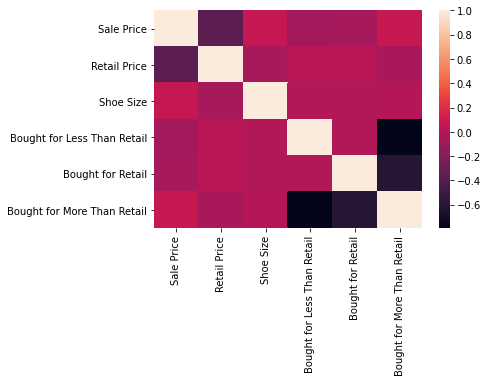

In [ ]:
# Genereal numeric correlations
# Analyze trend between shoe size and sale price
# Analyze trend between sale price and retail price
correlations = df.corr()
sns.heatmap(correlations)

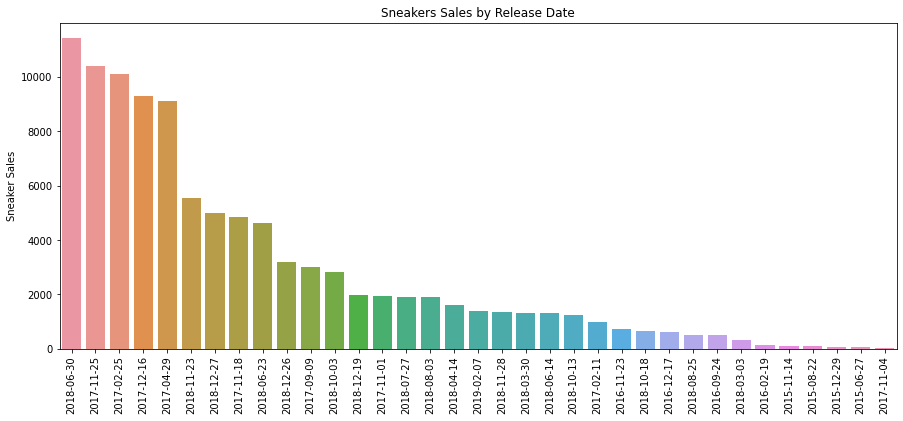

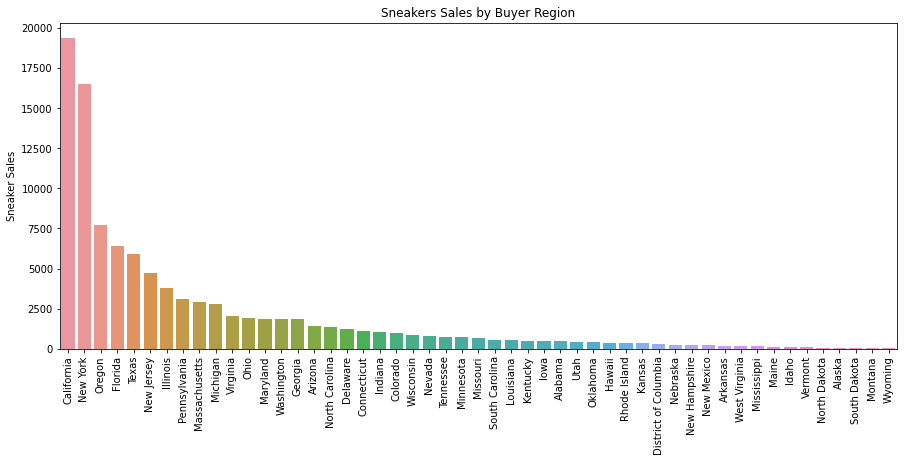

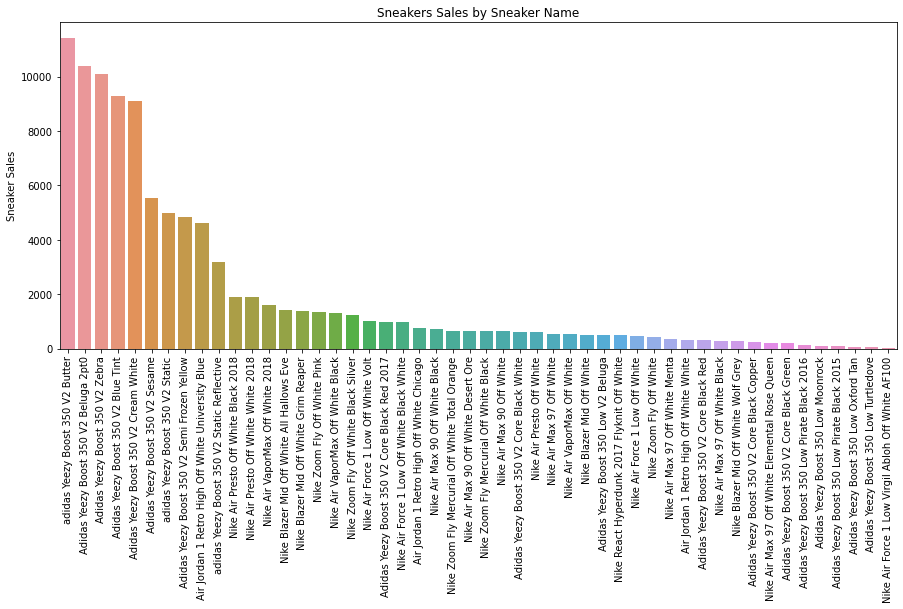

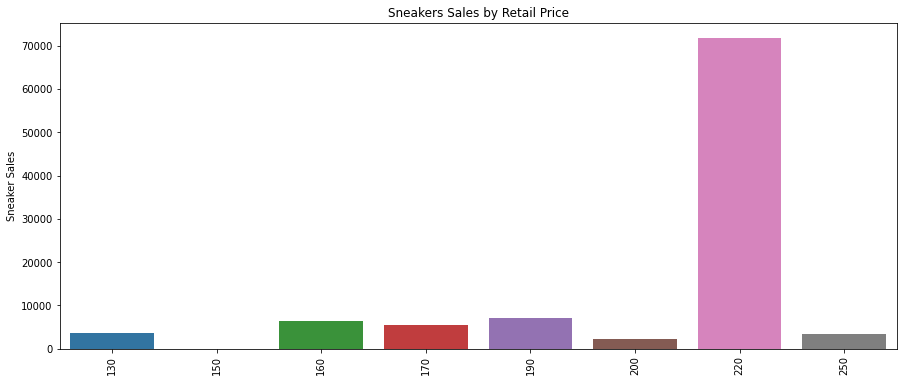

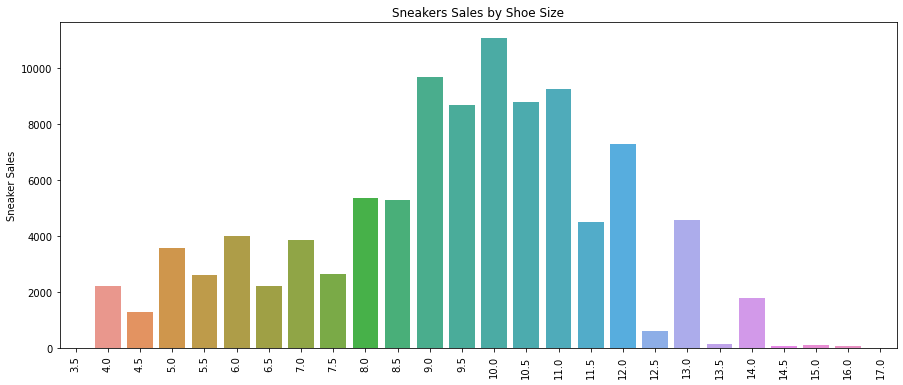

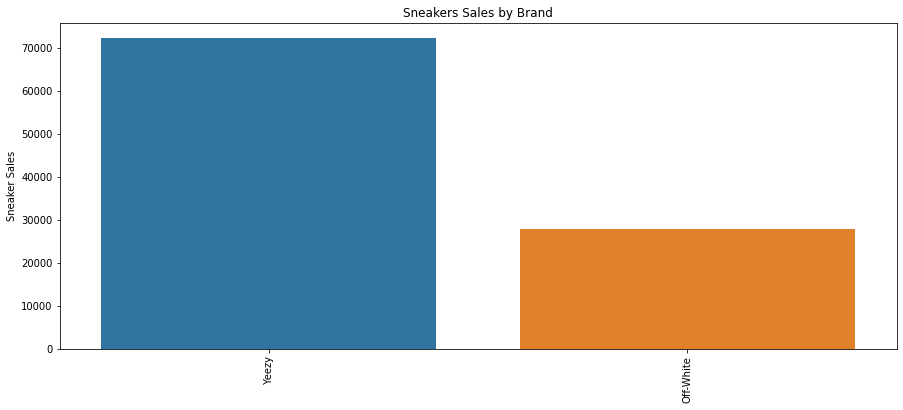

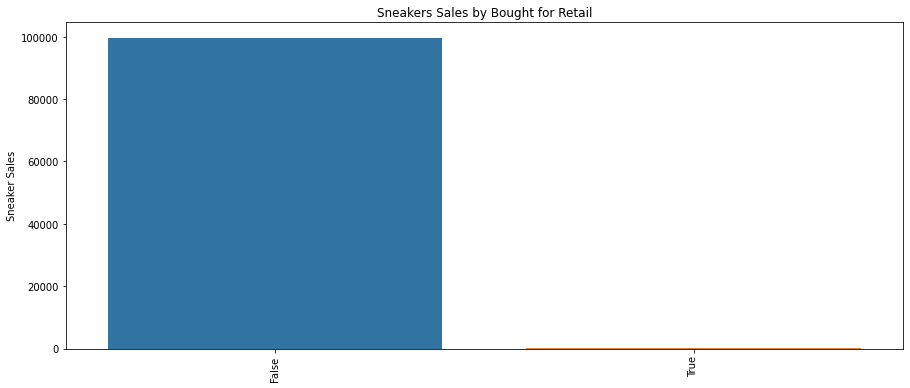

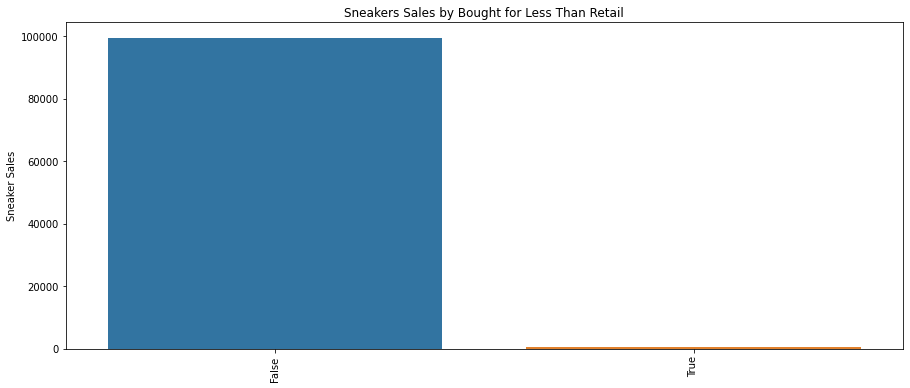

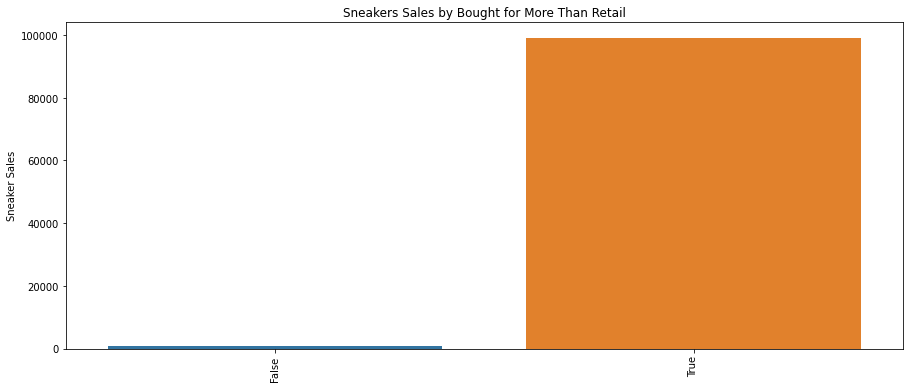

In [ ]:
# Release date, buyer region, and sneaker name, retail price, shoe size, and brand distribution analysis
df_cat = ['Release Date', 'Buyer Region', 'Sneaker Name', 'Retail Price', 'Shoe Size', 'Brand', 'Bought for Retail', 'Bought for Less Than Retail', 'Bought for More Than Retail' ]
for cat in df_cat:
    cat_num = df[str(cat)].value_counts()
    plt.figure(figsize=(15,6))
    chart = sns.barplot(x = cat_num.index, y= cat_num)
    chart.set_title("Sneakers Sales by %s" % (cat))
    plt.ylabel("Sneaker Sales")
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.show(15)

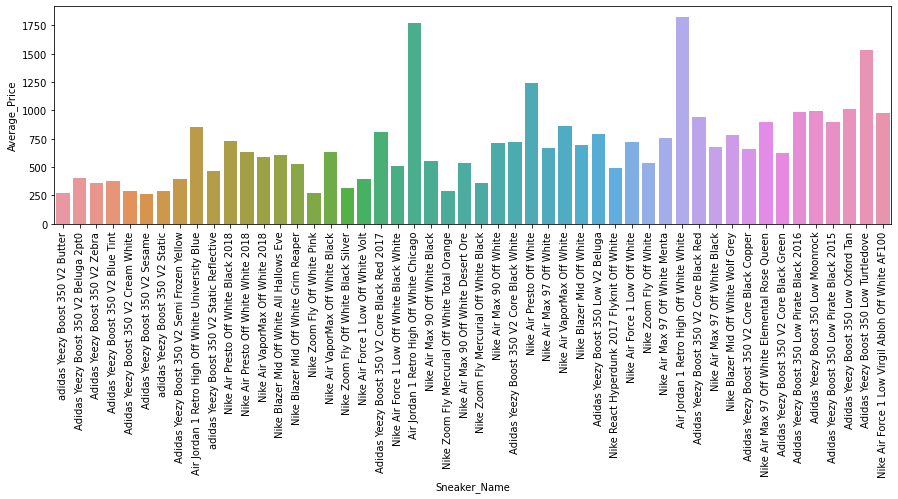

In [ ]:
# Find average sale price per shoe (needs improvement)
# Create average retail price df
bruh = df[['Sneaker Name', 'Sale Price']]

# Clean up this list
sneakernames = ['adidas Yeezy Boost 350 V2 Butter',
       'Adidas Yeezy Boost 350 V2 Beluga 2pt0',
       'Adidas Yeezy Boost 350 V2 Zebra',
       'Adidas Yeezy Boost 350 V2 Blue Tint',
       'Adidas Yeezy Boost 350 V2 Cream White',
       'Adidas Yeezy Boost 350 V2 Sesame', 'adidas Yeezy Boost 350 V2 Static',
       'Adidas Yeezy Boost 350 V2 Semi Frozen Yellow',
       'Air Jordan 1 Retro High Off White University Blue',
       'adidas Yeezy Boost 350 V2 Static Reflective',
       'Nike Air Presto Off White Black 2018',
       'Nike Air Presto Off White White 2018',
       'Nike Air VaporMax Off White 2018',
       'Nike Blazer Mid Off White All Hallows Eve',
       'Nike Blazer Mid Off White Grim Reaper', 'Nike Zoom Fly Off White Pink',
       'Nike Air VaporMax Off White Black',
       'Nike Zoom Fly Off White Black Silver',
       'Nike Air Force 1 Low Off White Volt',
       'Adidas Yeezy Boost 350 V2 Core Black Red 2017',
       'Nike Air Force 1 Low Off White Black White',
       'Air Jordan 1 Retro High Off White Chicago',
       'Nike Air Max 90 Off White Black',
       'Nike Zoom Fly Mercurial Off White Total Orange',
       'Nike Air Max 90 Off White Desert Ore',
       'Nike Zoom Fly Mercurial Off White Black', 'Nike Air Max 90 Off White',
       'Adidas Yeezy Boost 350 V2 Core Black White',
       'Nike Air Presto Off White', 'Nike Air Max 97 Off White',
       'Nike Air VaporMax Off White', 'Nike Blazer Mid Off White',
       'Adidas Yeezy Boost 350 Low V2 Beluga',
       'Nike React Hyperdunk 2017 Flyknit Off White',
       'Nike Air Force 1 Low Off White', 'Nike Zoom Fly Off White',
       'Nike Air Max 97 Off White Menta',
       'Air Jordan 1 Retro High Off White White',
       'Adidas Yeezy Boost 350 V2 Core Black Red',
       'Nike Air Max 97 Off White Black',
       'Nike Blazer Mid Off White Wolf Grey',
       'Adidas Yeezy Boost 350 V2 Core Black Copper',
       'Nike Air Max 97 Off White Elemental Rose Queen',
       'Adidas Yeezy Boost 350 V2 Core Black Green',
       'Adidas Yeezy Boost 350 Low Pirate Black 2016',
       'Adidas Yeezy Boost 350 Low Moonrock',
       'Adidas Yeezy Boost 350 Low Pirate Black 2015',
       'Adidas Yeezy Boost 350 Low Oxford Tan',
       'Adidas Yeezy Boost 350 Low Turtledove',
       'Nike Air Force 1 Low Virgil Abloh Off White AF100'
       ]
avgs = []
for name in sneakernames:
    shoerow = bruh.loc[bruh['Sneaker Name'] == name]
    avgs.append(shoerow.mean()[0])
AvgPrice = pd.Series(avgs)
SneakerName = pd.Series(sneakernames)
avgprice_df = pd.DataFrame(columns = ['Sneaker_Name', 'Average_Price'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Price'] = AvgPrice

# Crerating visual of average shoe price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'] , y= avgprice_df['Average_Price'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))


In [ ]:
# Find average sale price by brand
avgs_2 = []
bds = df[['Brand', 'Sale Price']]
brands = [' Yeezy', 'Off-White']
for brand in brands:
    brandrow = bds.loc[bds['Brand'] == str(brand)]
    avgs_2.append(brandrow['Sale Price'].mean())
print('Yeezy average price: $' + str(avgs_2[0]))
print('Off-White average price: $' + str(avgs_2[1]))

Yeezy average price: $360.03255175854326
Off-White average price: $671.4812909260992


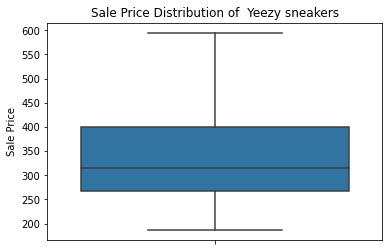

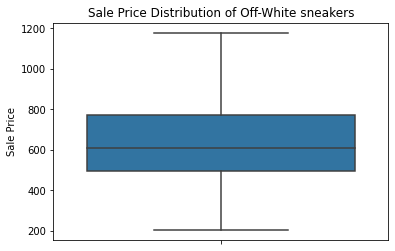

In [ ]:
# Create boxplot distribution of sales price by brand
for brand in brands:
    brandrow = bds.loc[bds['Brand'] == str(brand)]
    chart = sns.boxplot(y=brandrow["Sale Price"], showfliers = False)
    chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
    plt.show()

In [ ]:
# Analyze trend between Sales Price and Order Date
# Find average sale price per day
dts = df[['Order Date', 'Sale Price']]
uniq_ord_dates = df['Order Date'].value_counts().index.tolist()
avg_3 = []

for date in uniq_ord_dates:
    daterow = dts.loc[dts['Order Date'] == str(date)]
    avg_3.append(daterow['Sale Price'].mean())

unq_dates = pd.Series(uniq_ord_dates)
date_avgs = pd.Series(avg_3)
dateprice_df = pd.DataFrame(columns = ['Order_date', 'Average_Price'])
dateprice_df['Order_date'] = unq_dates.sort_values(ascending = True)
dateprice_df['Average_Price'] = date_avgs
dateprice_df.head()

,Order_date,Average_Price
485,2017-09-01,653.000000
510,2017-09-02,649.600000
506,2017-09-03,672.437500
501,2017-09-04,623.764706
486,2017-09-05,648.772727


Text(0.5, 1.0, 'Average Daily Sale Price Over time')

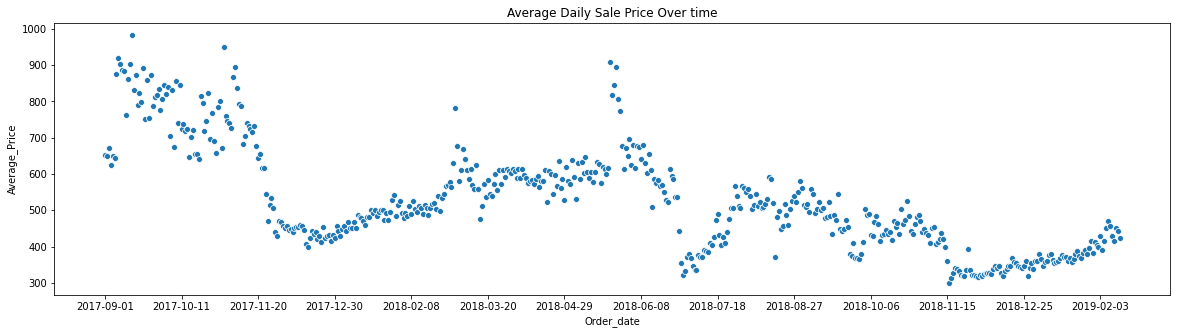

In [ ]:
# Create visualization of Average Sale Price Over time
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Order_date", y="Average_Price", data=dateprice_df)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))
chart.set_title("Average Daily Sale Price Over time")

In [ ]:
# Finding Average Sale Price on Release Dates Over Time
dts = df[['Release Date', 'Sale Price']]
uniq_rel_dates = df['Release Date'].value_counts().index.tolist()
avg_4 = []

for date in uniq_rel_dates:
    daterow = dts.loc[dts['Release Date'] == str(date)]
    avg_4.append(daterow['Sale Price'].mean())

unq_dates = pd.Series(uniq_rel_dates)
date_avgs = pd.Series(avg_4)
dateprice_df_2 = pd.DataFrame(columns = ['Release_date', 'Average_Price'])
dateprice_df_2['Release_date'] = unq_dates.sort_values(ascending = True)
dateprice_df_2['Average_Price'] = date_avgs
dateprice_df_2.head()

,Release_date,Average_Price
33,2015-06-27,1531.661765
31,2015-08-22,895.094737
30,2015-11-14,996.710000
32,2015-12-29,1011.514286
29,2016-02-19,984.237705


In [ ]:
# Counting release dates
len(df['Release Date'].value_counts())

35

Text(0.5, 1.0, 'Average Sale Price on Release Dates Over Time')

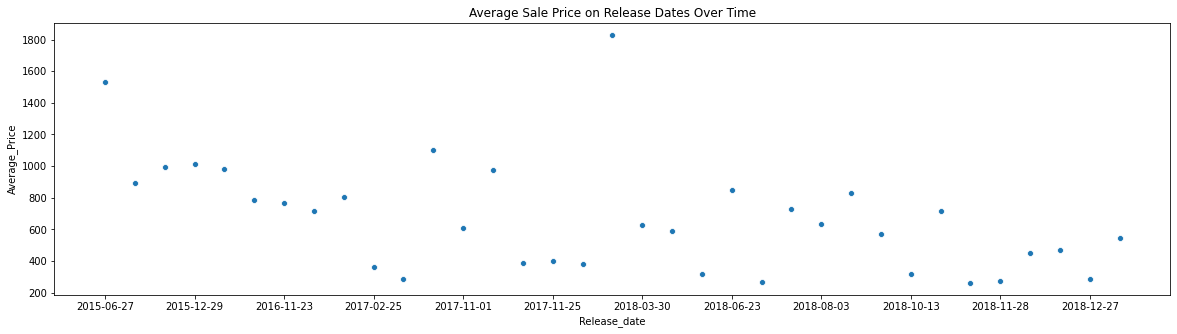

In [ ]:
# Create visualization of Average Sale Price on Release Dates Over Time
# Analyze trend between sale price and release date
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Release_date", y="Average_Price", data=dateprice_df_2)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
chart.set_title("Average Sale Price on Release Dates Over Time")